In [1]:
%pip install matplotlib pandas


You should consider upgrading via the '/Users/calistamayer/.pyenv/versions/3.10.5/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Bar chart of minutes spent running in a 30 day range.

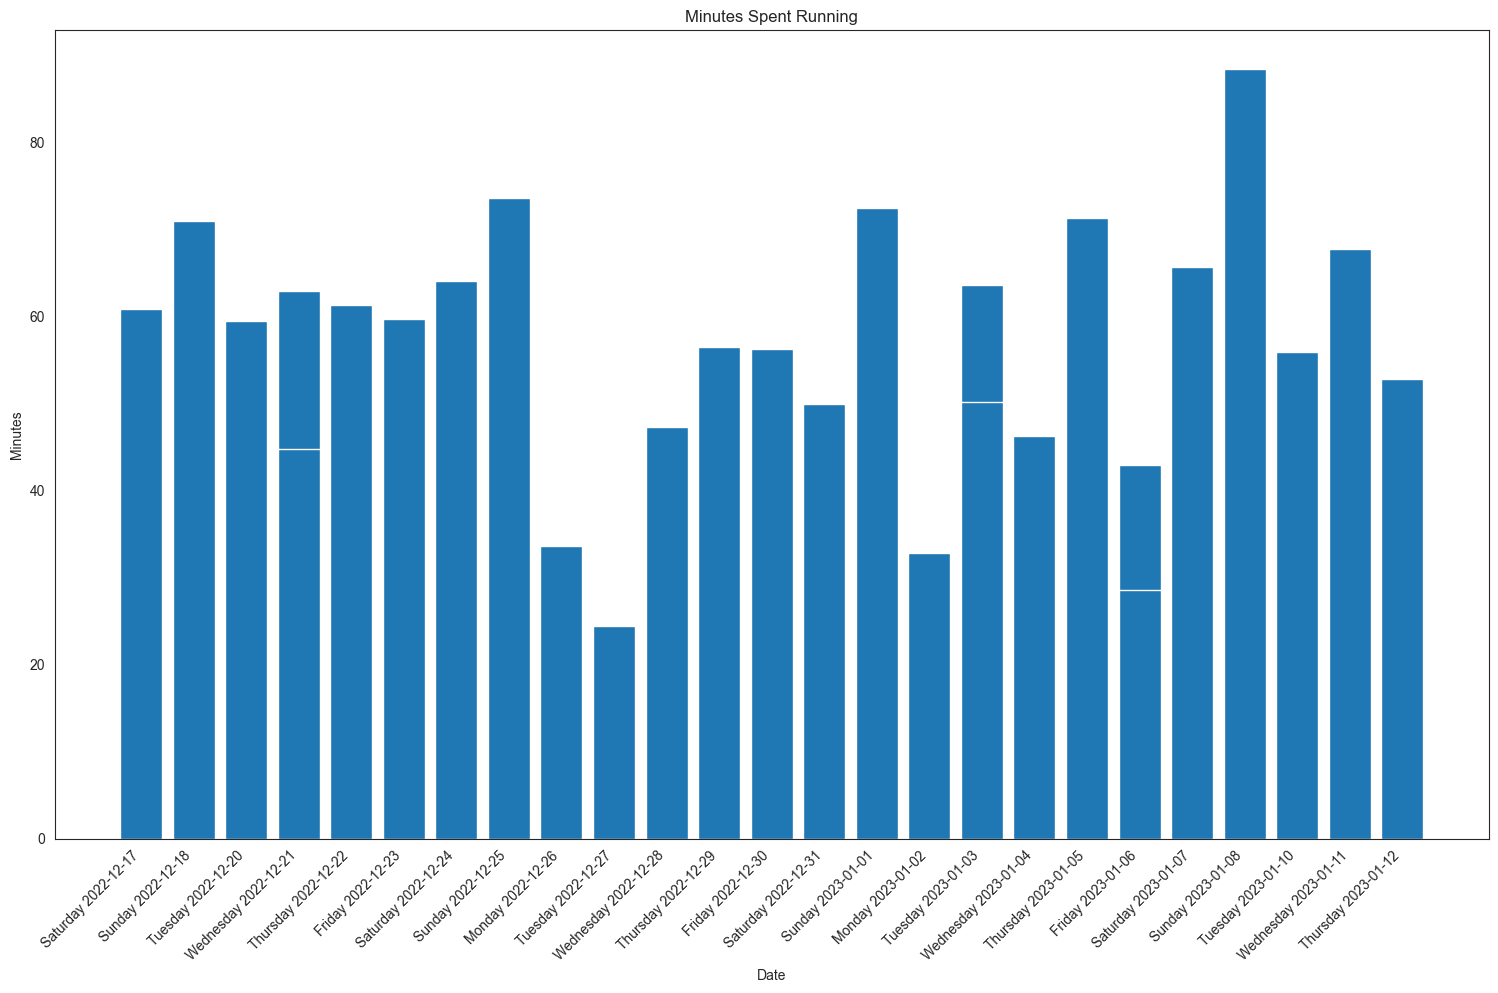

In [22]:
import json
import matplotlib.pyplot as plt
import pandas as pd


with open("response_1673562474836.json") as file:
  data = json.load(file)

minutes = []
day_of_week = []

for minute in data: 
  date_str = minute.get("start_date")[0:10]
  day = pd.Timestamp(date_str).day_name()
  day_of_week.insert(0, f'{day} {date_str}')
  in_seconds = minute.get("moving_time")
  in_minutes = in_seconds / 60
  minutes.insert(0, in_minutes)

plt.bar(day_of_week, minutes)
plt.gcf().set_size_inches(18.5, 10.5)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Minutes")
plt.xlabel("Date")
plt.title('Minutes Spent Running')
plt.show()

## Bar chart of running mileage per day in a 30 day range. 

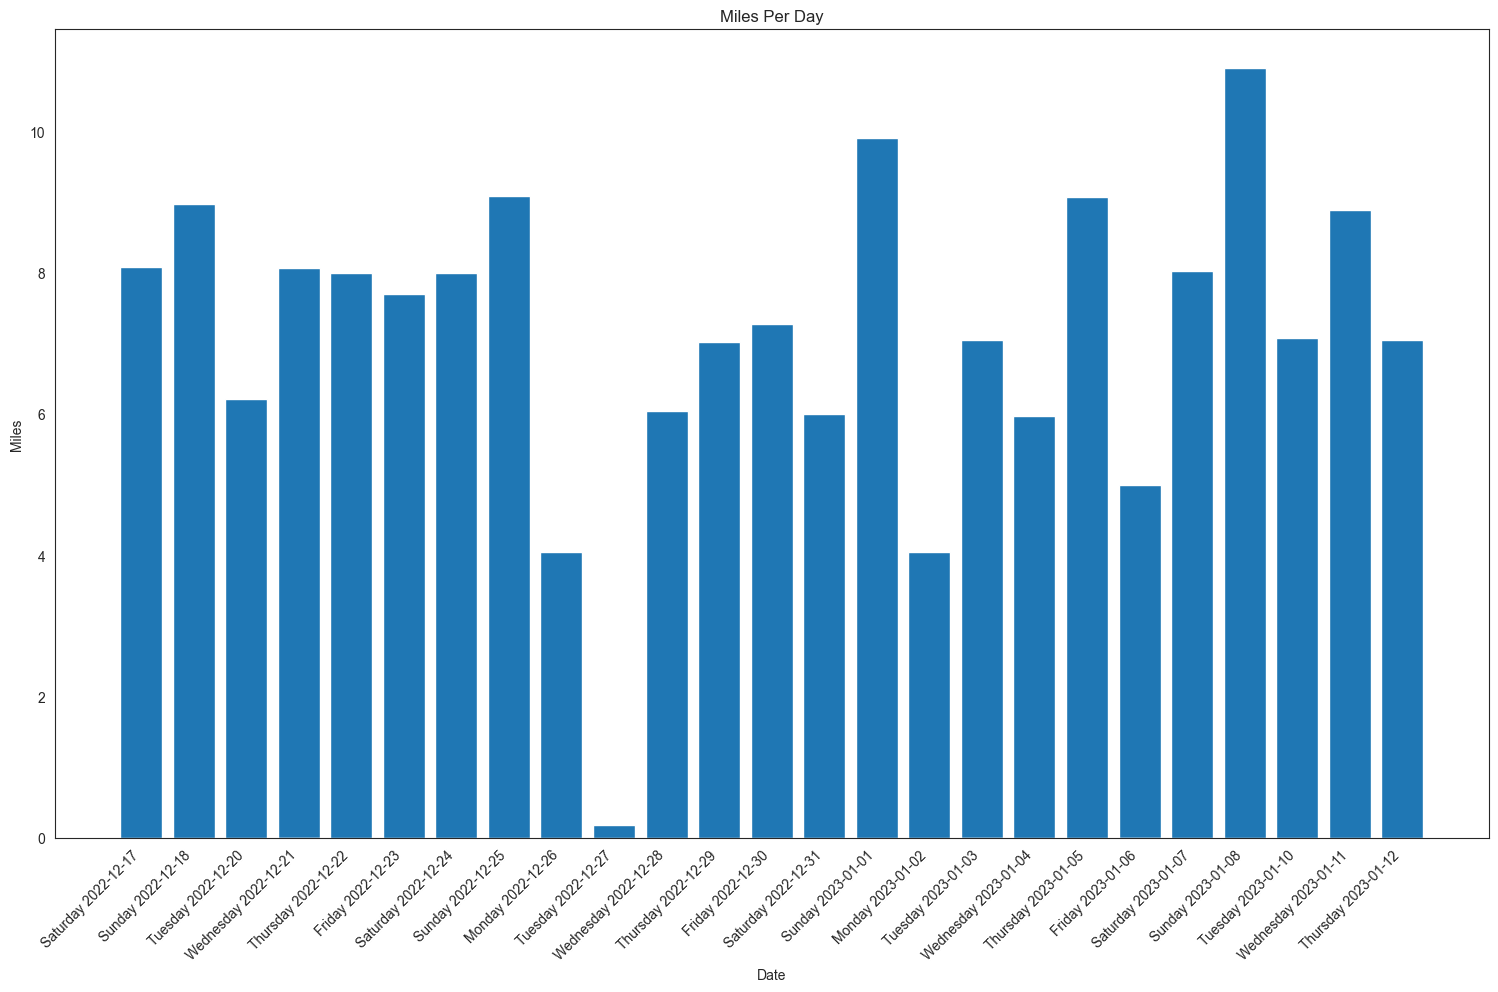

In [23]:
import json
import matplotlib.pyplot as plt
import pandas as pd


with open("response_1673562474836.json") as file:
  data = json.load(file)

runs = []
day_of_week = []

for run in data: 
  date_str = run.get("start_date")[0:10]
  day = pd.Timestamp(date_str).day_name()
  day_of_week.insert(0, f'{day} {date_str}')
  in_meters = run.get("distance")
  in_miles = in_meters * 0.0006213712
  runs.insert(0, in_miles)

plt.bar(day_of_week, runs)
plt.gcf().set_size_inches(18.5, 10.5)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Miles")
plt.xlabel("Date")
plt.title('Miles Per Day')
plt.show()


## Box plot of average daily mileage in the past 4 years. 

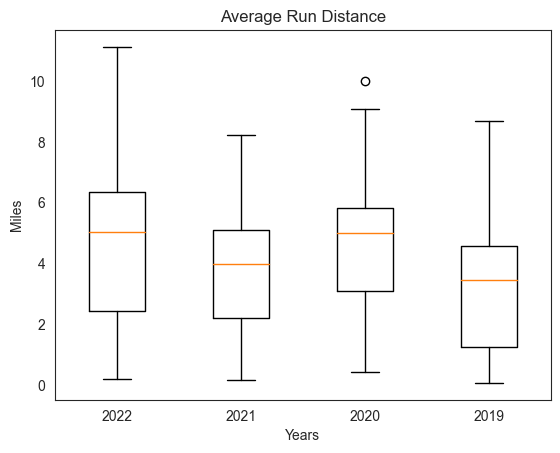

In [25]:
import matplotlib.pyplot as plt
import json


labels = ['2019', '2020', '2021', '2022']
def get_runs(json_string):
    runs = []
    with open(json_string) as file:
        data = json.load(file)
    for run in data:
        if run.get("type") == "Run":
            in_meters = run.get('distance')
            in_miles = in_meters * 0.0006213712
            runs.insert(0, in_miles)
    return runs


data_2022 = get_runs("2022.json")
data_2021 = get_runs("2021.json")
data_2020 = get_runs("2020.json")
data_2019 = get_runs("2019.json")

data = [data_2022, data_2021, data_2020, data_2019]

plt.boxplot(data)
plt.xticks([1, 2, 3, 4], ['2022', '2021', '2020', '2019'])
plt.xlabel('Years')
plt.ylabel('Miles')
plt.title('Average Run Distance')
plt.show()



